In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections

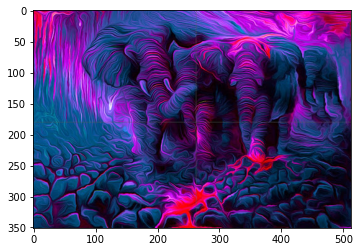

In [123]:
img = mpimg.imread("elephant.jpg")
plt.imshow(img)
plt.show()

In [124]:
print(img.shape)

(351, 512, 3)


In [125]:
#flatten each channel of the image in linear array
all_pixels = img.reshape((351*512 , 3))
print(all_pixels.shape)

(179712, 3)


In [126]:
from sklearn.cluster import KMeans

In [134]:
dominant_colors = 2
model = KMeans(n_clusters = dominant_colors)
labels = model.fit_predict(all_pixels)

In [144]:
labels
collections.Counter(labels)

Counter({1: 53752, 0: 125960})

In [145]:
centers = model.cluster_centers_


In [146]:
centers = np.array(centers, dtype = 'uint8')

In [147]:
centers

array([[ 27,  36,  84],
       [141,  40, 176]], dtype=uint8)

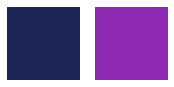

In [148]:
i= 1
colors = []
for each_col in centers:
    plt.subplot(2,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #colors watch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting original image

In [149]:
rgb_codes = centers
rgb_codes[labels]

array([[141,  40, 176],
       [ 27,  36,  84],
       [141,  40, 176],
       ...,
       [141,  40, 176],
       [141,  40, 176],
       [141,  40, 176]], dtype=uint8)

In [150]:
a = model.labels_
print(len(a))

179712


In [151]:
new_quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

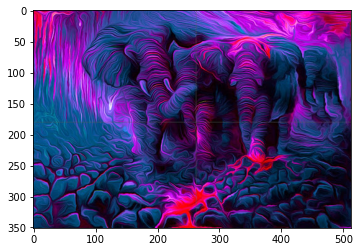

In [152]:
plt.imshow(img)
plt.show()

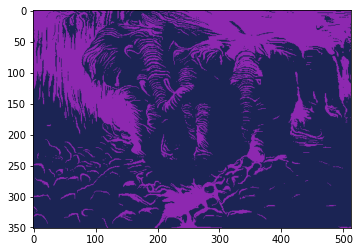

In [153]:
plt.imshow(new_quantized_image)
plt.show()